In [77]:
import os
import sys
import time
from naoqi import ALProxy
import numpy as np
import cv2
import time
from datetime import datetime
import os
# import pika #1.1.0
import base64
import time 
import yaml
import cv2
import requests
import json
import numpy as np
import matplotlib.pyplot as plt

In [78]:
NAO_IP = "10.0.255.8"
NAO_PORT = 9559
PEPPER_IP = "10.0.52.247"
PEPPER_PORT = 9503

width = 1280
height = 960
channel = 3
 
fps = 30
sec = 5

In [83]:
def detect(frame):
  
  img = frame.copy()
  lower_red = np.array([0, 0, 90])
  upper_red = np.array([120, 60, 255])
  x,y,radius = None, None, None

  # Create a mask to isolate the red color region in the RGB image
  frame = cv2.inRange(frame, lower_red, upper_red)
  kernel = np.ones((3, 3), np.float32) / 9

  frame = cv2.erode(frame, kernel, iterations=3)

  contours, _ = cv2.findContours(frame, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # If contours are found
  if contours:
    # Get the largest contour (assuming it's the blob)
      largest_contour = max(contours, key=cv2.contourArea)
      
      # Find the minimum enclosing circle for the contour
      (x, y), radius = cv2.minEnclosingCircle(largest_contour)
      
      # Convert the coordinates to integers
      center = (int(x), int(y))
      radius = int(radius)
      
      # Draw the minimum enclosing circle on a color image
      frame = cv2.cvtColor(frame, cv2.COLOR_GRAY2BGR)  # Convert to color image
      cv2.circle(img, center, radius, (255, 0, 0), 2)  # Draw red circle
      
      #print("Radius of the blob:", radius)
  else:
      print("No blob found.")

      
  return img , x,y,radius

In [84]:
tts = ALProxy("ALVideoDevice", NAO_IP, NAO_PORT)
camera_index = 0
resolution = 3
colourspace = 11
FPS = 5

subscriberID = tts.subscribeCamera("subscriberID", camera_index, resolution,colourspace, FPS)
print("id : " , subscriberID)
tts.openCamera(camera_index)
tts.startCamera(camera_index)


while True:

  nao_image = tts.getImageRemote(str(subscriberID))

  img = (np.reshape(np.frombuffer(nao_image[6], dtype = '%iuint8' % nao_image[2]), (nao_image[1], nao_image[0], nao_image[2])))
  img = np.array(img)
  #img = np.flipud(img)
  # cv2.imwrite("img.jpg" , img)

  img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR) 

  # print( (nao_image[1], nao_image[0], nao_image[2]) , time.time())

  img , x,y, radius = detect(img)
  print(x , y, radius)
  if radius > 50:
    
  cv2.imshow("Output", img)

  k = cv2.waitKey(33)
  if k==27:    # Esc key to stop
    break
  
tts.releaseImage(subscriberID)
tts.unsubscribe(subscriberID)

cv2.destroyAllWindows()

('id : ', 'subscriberID_1')
(354.5, 3.0, 3)
(738.5, 96.5, 2)
(717.0, 87.5, 2)
(723.0, 90.5, 1)
(402.0, 19.5, 1)
(5.0, 732.5, 6)
(213.4337158203125, 703.554931640625, 81)
(232.28932189941406, 746.2408447265625, 86)
(216.0459442138672, 767.5025634765625, 93)
(212.9289093017578, 783.862060546875, 89)
(222.0054168701172, 805.291259765625, 93)
(228.22157287597656, 798.8563842773438, 92)
(219.61509704589844, 801.9205932617188, 86)
(181.50741577148438, 792.0842895507812, 85)
(141.26324462890625, 755.0693359375, 85)
(113.7894287109375, 729.7160034179688, 84)
(96.09602355957031, 704.2615966796875, 84)
(72.3766098022461, 668.3271484375, 82)
(57.67357635498047, 643.2905883789062, 81)
(33.29999923706055, 640.375, 78)
(30.825559616088867, 612.3141479492188, 56)
(742.0, 99.0, 0)
(21.28862190246582, 581.5872192382812, 72)
(169.89549255371094, 606.3534545898438, 84)
(476.4599914550781, 656.4447021484375, 93)
(692.5, 665.0, 104)
(795.6889038085938, 598.2113037109375, 91)
(849.5, 528.5, 108)
(950.426940

In [76]:
tts.releaseImage(subscriberID)
tts.unsubscribe(subscriberID)

True

In [9]:
motion_service = ALProxy("ALMotion" , NAO_IP, NAO_PORT)

motion_service.setStiffnesses("RArm", 1.0)

names = "RElbowRoll"
angles = 1.5
fractionMaxSpeed = 0.1

motion_service.setAngles(names, angles, fractionMaxSpeed)

# time.sleep(5)

# motion_service.setStiffnesses("RElbowRoll", 0.0)

In [39]:
motion_service = ALProxy("ALMotion" , NAO_IP, NAO_PORT)
target_angles = [1.5, 0.0, 0.0, 0.0] 
max_speed_fraction = 0.3

motion_service.setSmartStiffnessEnabled(False)
motion_service.setIdlePostureEnabled("RArm",False)

motion_service.setStiffnesses("RArm", 1.0)

time.sleep(3)
motion_service.setAngles( ["RShoulderPitch", "RShoulderRoll", "RElbowYaw", "RElbowRoll"], target_angles, max_speed_fraction)


In [59]:
motion_service = ALProxy("ALMotion" , NAO_IP, NAO_PORT)
target_angles = [0.9, 1.5, 2.0, -1.5, 1.8, -0.9, -1.5, -2.0, 1.5, -1.8 ] 
target_angles1 = [ -elem for elem in target_angles ]

t = [0,0, 0,0, 0,0 ,0,0 , 0,0 ] 

max_speed_fraction = 0.3

motion_service.setSmartStiffnessEnabled(False)
motion_service.setIdlePostureEnabled("LArm",False)

motion_service.setStiffnesses("LArm", 1.0)

motion_service.setSmartStiffnessEnabled(False)
motion_service.setIdlePostureEnabled("RArm",False)

motion_service.setStiffnesses("RArm", 1.0)

time.sleep(3)
motion_service.setAngles( ["LShoulderPitch", "LShoulderRoll", "LElbowYaw", "LElbowRoll", "LWristYaw", "RShoulderPitch", "RShoulderRoll", "RElbowYaw", "RElbowRoll", "RWristYaw"], t, max_speed_fraction)



In [ ]:
motion_service = ALProxy("ALMotion" , NAO_IP, NAO_PORT)
target_angles = [0.9, 1.5, 2.0, -1.5, 1.8] 
#target_angles = [0.0, 0.0, 0.0, 0.0, 0.0] 

max_speed_fraction = 0.3

motion_service.setSmartStiffnessEnabled(False)
motion_service.setIdlePostureEnabled("LArm",False)

motion_service.setStiffnesses("LArm", 1.0)

time.sleep(3)
motion_service.setAngles( ["LShoulderPitch", "LShoulderRoll", "LElbowYaw", "LElbowRoll", "LWristYaw"], target_angles, max_speed_fraction)


In [112]:
motion_service.closeHand('RHand')

In [112]:
motion_service = ALProxy("ALMotion" , NAO_IP, NAO_PORT)


motion_service.setStiffnesses("Head", 1.0)

# Simple command for the HeadYaw joint at 10% max speed
names            = ["HeadYaw", "HeadPitch"]
angles           = [0.0,0.0]
fractionMaxSpeed = 0.2
motion_service.setAngles(names,angles,fractionMaxSpeed)


In [51]:
cv2.destroyAllWindows()

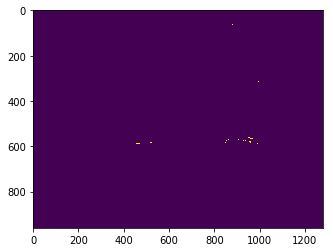

In [82]:
frame = cv2.imread("img.jpg")

lower_red = np.array([0, 0, 90])
upper_red = np.array([120, 60, 255])

# Create a mask to isolate the red color region in the RGB image
mask = cv2.inRange(frame, lower_red, upper_red)
kernel = np.ones((3, 3), np.float32) / 9

mask = cv2.erode(mask, kernel, iterations=3)
# plt.imshow(mask)

In [53]:
# Find contours in the image
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# If contours are found
if contours:
   # Get the largest contour (assuming it's the blob)
    largest_contour = max(contours, key=cv2.contourArea)
    
    # Find the minimum enclosing circle for the contour
    (x, y), radius = cv2.minEnclosingCircle(largest_contour)
    
    # Convert the coordinates to integers
    center = (int(x), int(y))
    radius = int(radius)
    
    # Draw the minimum enclosing circle on a color image
    image_with_circle = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)  # Convert to color image
    cv2.circle(image_with_circle, center, radius, (0, 0, 255), 2)  # Draw red circle
    
    print("Radius of the blob:", radius)
else:
    print("No blob found.")

No blob found.


In [54]:
plt.imshow(image_with_circle)

NameError: name 'image_with_circle' is not defined

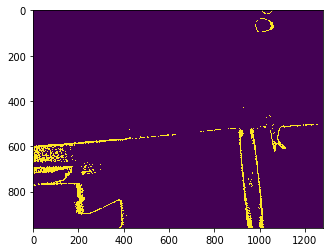

In [ ]:
lower_red = np.array([0, 0, 100])
upper_red = np.array([120, 200, 255])

# Create a mask to isolate the red color region in the RGB image
mask = cv2.inRange(frame, lower_red, upper_red)
plt.imshow(mask)

In [ ]:
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, red_Low, red_Up)
plt.imshow(mask)

NameError: name 'red_Low' is not defined

In [ ]:


mask = cv2.erode(mask, None, iterations=2)
mask = cv2.dilate(mask, None, iterations=2)
cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]
centre = None
if len(cnts) > 0:
    c = max(cnts, key = cv2.contourArea)
    ((x, y), radius) = cv2.minEnclosingCircle(c)
    M = cv2.moments(c)
    centre = (int(M["m10"]/M["m00"]), int(M["m01"]/M["m00"]))
    if radius > 10:
        flag_red_ball = 1
        cv2.circle(frame, (int(x), int(y)), int(radius), (0, 255, 255), 2)
        cv2.circle(frame, centre, 3, (0, 0, 255), -1)
cv2.imwrite('Frame.jpg', frame)

True

In [100]:

posture_service = ALProxy("ALRobotPosture" , NAO_IP, NAO_PORT)

In [102]:
posture_service.goToPosture("Stand", 0.3)

True